# Assignment 07

## Question 1

### Part B

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ulysses = pd.read_csv('ulysses.txt', delimiter=':', names=['word', 'word_frequency'])
ulysses.head()

word  word_frequency
0    0              41
1  000              11
2  035               1
3    1              74
4   10              20

In [3]:
t = ulysses['word_frequency'].sum()
t

264706

In [4]:
distinct_elephants = ulysses['word'].count()
distinct_elephants

31396

In [5]:
distinct_elephants/t

0.11860705839686293

### Part C

In [6]:
def n1(rho):
    return 1 / (2 - rho)

def n2(rho):
    return (1 - rho) / ( 6 - 7*rho + 2*rho**2)

def n3(rho):
    return (2 - 4*rho + 2*rho**2) / (24 - 46*rho + 29*rho**2 - 6*rho**3)

In [7]:
# Simon's estimates
print("n1: ", n1(0.115))
print("n2: ", n2(0.115))
print("n3: ", n3(0.115))

n1:  0.5305039787798409
n2:  0.1694931484549311
n3:  0.08208012934753163


In [8]:
# My estimates
print("n1: ", n1(distinct_elephants/t))
print("n2: ", n2(distinct_elephants/t))
print("n3: ", n3(distinct_elephants/t))

n1:  0.5315210756280923
n2:  0.16956758293126487
n3:  0.08202433409844422


In [9]:
ulysses_grouped = ulysses.groupby('word_frequency').agg(num_words=('word', 'count')).reset_index()

In [10]:
pd.set_option('display.max_rows', 500)
ulysses_grouped.head(10)

word_frequency  num_words
0               1      17737
1               2       4887
2               3       2241
3               4       1282
4               5        918
5               6        647
6               7        476
7               8        365
8               9        279
9              10        233

In [14]:
ulysses_grouped['n'] = ulysses_grouped['num_words'] / distinct_elephants
ulysses_grouped.head()

word_frequency  num_words         n  log10_word_frequency   log10_n
0               1      17737  0.564945              0.000000 -0.247994
1               2       4887  0.155657              0.301030 -0.807832
2               3       2241  0.071379              0.477121 -1.146432
3               4       1282  0.040833              0.602060 -1.388986
4               5        918  0.029239              0.698970 -1.534032

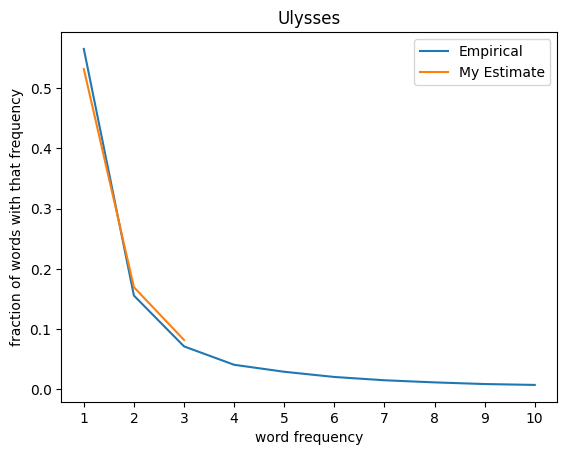

In [50]:
plt.plot(ulysses_grouped['word_frequency'][:10], ulysses_grouped['n'][:10], label='Empirical')
plt.plot([1,2,3], [n1(0.1186), n2(0.1186), n3(0.1186)], label="My Estimate")
plt.xlabel("word frequency")
plt.ylabel("fraction of words with that frequency")
plt.title("Ulysses")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()

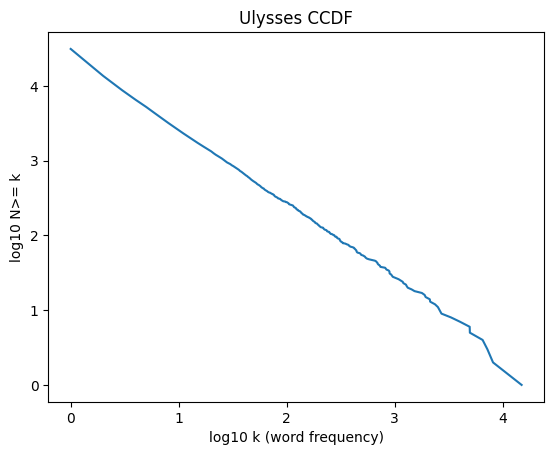

In [95]:
ulysses_grouped = ulysses_grouped.sort_values(by='word_frequency', ascending=False)
ulysses_grouped['cumul_num_words'] = ulysses_grouped['num_words'].cumsum()
ulysses_grouped['log10_ngreaterk'] = np.log10(ulysses_grouped['cumul_num_words'])
ulysses_grouped['log10_word_frequency'] = np.log10(ulysses_grouped['word_frequency'])

plt.plot(ulysses_grouped['log10_word_frequency'], ulysses_grouped['log10_ngreaterk'])
plt.xlabel("log10 k (word frequency)")
plt.ylabel("log10 N>= k")
plt.title("Ulysses CCDF")
plt.show()

## Question 2

### Pride and Prejudice

In [63]:
import string

In [64]:
with open('pride_and_prejudice.txt') as f:
    pandp_lines = f.readlines()

In [65]:
# start with 10k lines to test
gutenberg_stuff_ends = '      (example: M^{rs}).\n'
gutenberg_stuff_begins = '            *** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***\n'
gutenberg_end_index = pandp_lines.index(gutenberg_stuff_ends) + 1
gutenberg_begin_index = pandp_lines.index(gutenberg_stuff_begins)
print(gutenberg_end_index)
print(gutenberg_begin_index)
pandp_lines = pandp_lines[gutenberg_end_index:gutenberg_begin_index]

51
13355


In [112]:
# # for testing
# pandp_lines = pandp_lines[:1000]

In [66]:
word_counts = {}

for line in pandp_lines:
    line = line.replace('\n', '').lower().replace(',', ' ')  # .replace('-', ' ')
    line = line.translate(str.maketrans('', '', string.punctuation))
    line_array = line.split(' ')
    for el in line_array:
        if el == '':
            continue
        word_counts.setdefault(el, 0)
        word_counts[el] += 1

In [67]:
prideprej = pd.DataFrame(data = word_counts.items(), columns=['word', 'word_frequency'])
prideprej.head(100)

word  word_frequency
0           pride              51
1             and            3525
2       prejudice              11
3               a            1926
4           novel               3
5              in            1869
6           three              64
7         volumes               3
8              by             636
9             the            4324
10         author               3
11             of            3621
12          sense              38
13    sensibility               5
14            vol               4
15              i            2016
16         london              57
17        printed               4
18            for            1051
19              t               3
20        egerton               3
21       military               4
22        library              25
23      whitehall               3
24           1813               3
25   illustration               5
26        morning              76
27          dress               6
28       invented               1
29            mrs             343
30           bell               6
31             26               1
32      charlotte              68
33         street              12
34        bedford               1
35         square               1
36       engraved               1
37             no             484
38             72               1
39             la               4
40          belle               1
41      assemblee               1
42            1st               1
43           july               2
44           1815               1
45        chapter              61
46             it            1504
47             is             855
48          truth              27
49    universally               3
50   acknowledged              20
51           that            1574
52         single              12
53            man             141
54     possession               9
55           good             191
56        fortune              39
57           must             308
58             be            1232
59           want              44
60           wife              44
61        however             134
62         little             189
63          known              57
64       feelings              88
65             or             294
66          views              11
67           such             387
68            may             194
69             on             718
70            his            1269
71          first             146
72       entering               9
73  neighbourhood              29
74           this             448
75             so             587
76           well             212
77          fixed              22
78          minds               3
79    surrounding               2
80       families               7
81             he            1321
82     considered              23
83             as            1187
84       rightful               1
85       property               8
86           some             207
87            one             289
88          other             207
89          their             440
90      daughters              56
91             my             716
92           dear             157
93             mr             773
94         bennet             292
95           said             397
96           lady             180
97             to            4125
98            him             760
99            day             129

In [77]:
total_count_pp = prideprej['word_frequency'].sum()
distinct_words_pp = prideprej['word'].count()
distinct_words_pp/total_count_pp

0.05702049456049095

In [84]:
pride_prej_group = prideprej.groupby('word_frequency').agg(num_words=('word', 'count')).reset_index()
pride_prej_group['fraction'] = pride_prej_group['num_words'] / distinct_words_pp
pride_prej_group.head(10)

word_frequency  num_words  fraction
0               1       2983  0.429209
1               2        931  0.133957
2               3        626  0.090072
3               4        368  0.052950
4               5        252  0.036259
5               6        191  0.027482
6               7        164  0.023597
7               8        137  0.019712
8               9         93  0.013381
9              10         83  0.011942

In [78]:
# My estimates
n1_p = n1(distinct_words_pp/total_count_pp)
n2_p = n2(distinct_words_pp/total_count_pp)
n3_p = n3(distinct_words_pp/total_count_pp)
print("n1: ", n1_p)
print("n2: ", n2_p)
print("n3: ", n3_p)

n1:  0.514673467836603
n2:  0.16816820001042707
n3:  0.08283192085777166


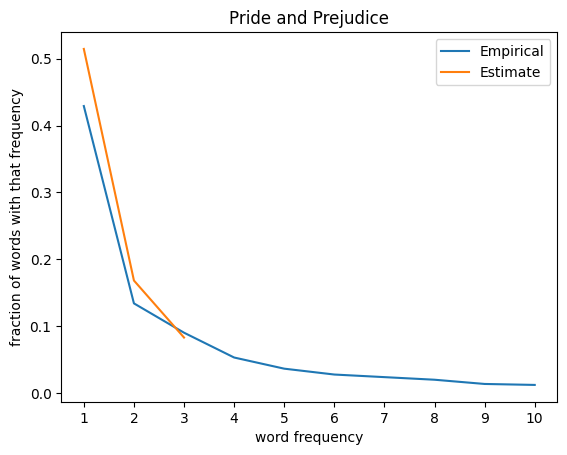

In [73]:
plt.plot(pride_prej_group['word_frequency'][:10], pride_prej_group['fraction'][:10], label='Empirical')
plt.plot([1,2,3], [n1_p, n2_p, n3_p], label="Estimate")
plt.xlabel("word frequency")
plt.ylabel("fraction of words with that frequency")
plt.title("Pride and Prejudice")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()

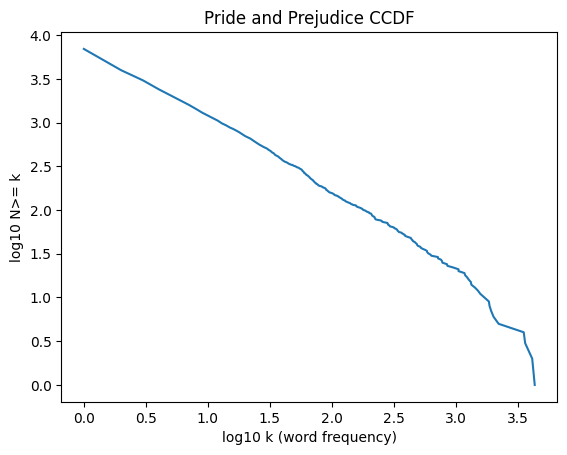

In [97]:
pride_prej_group = pride_prej_group.sort_values(by='word_frequency', ascending=False)
pride_prej_group['cumul_num_words'] = pride_prej_group['num_words'].cumsum()
pride_prej_group['log10_ngreaterk'] = np.log10(pride_prej_group['cumul_num_words'])
pride_prej_group['log10_word_frequency'] = np.log10(pride_prej_group['word_frequency'])

plt.plot(pride_prej_group['log10_word_frequency'], pride_prej_group['log10_ngreaterk'])
plt.xlabel("log10 k (word frequency)")
plt.ylabel("log10 N>= k")
plt.title("Pride and Prejudice CCDF")
plt.show()

### Count of Monte Cristo

In [79]:
with open('monte_cristo.txt') as f:
    mc_lines = f.readlines()

gutenberg_stuff_ends = '*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***\n'
gutenberg_stuff_begins = '            *** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***\n'
gutenberg_end_index = mc_lines.index(gutenberg_stuff_ends) + 1
gutenberg_begin_index = mc_lines.index(gutenberg_stuff_begins)
print(gutenberg_end_index)
print(gutenberg_begin_index)
mc_lines = mc_lines[gutenberg_end_index:gutenberg_begin_index]

24
16720


In [80]:
word_counts = {}

for line in mc_lines:
    line = line.replace('\n', '').lower().replace(',', ' ').replace('\'', ' ')
    line = line.translate(str.maketrans('', '', string.punctuation))
    line_array = line.split(' ')
    for el in line_array:
        if el == '':
            continue
        word_counts.setdefault(el, 0)
        word_counts[el] += 1

print(word_counts)

{'le': 3184, 'comte': 16, 'de': 4834, 'montecristo': 37, 'alexandre': 10, 'dumas': 2, 'tome': 2, 'i': 3, '18451846': 1, 'table': 57, 'des': 727, 'matières': 2, 'marseillel': 2, 'arrivée': 19, 'ii': 5, 'père': 187, 'et': 3159, 'fils': 69, 'iii': 2, 'les': 1352, 'catalans': 26, 'iv': 2, 'complot': 7, 'v': 2, 'repas': 23, 'fiançailles': 17, 'vi': 10, 'substitut': 32, 'du': 885, 'procureur': 32, 'roi': 112, 'vii': 4, 'l': 2381, 'interrogatoire': 13, 'viii': 2, 'château': 50, 'd': 1379, 'if': 41, 'ix': 2, 'soir': 47, 'x': 2, 'petit': 64, 'cabinet': 28, 'tuileries': 11, 'xi': 2, 'ogre': 4, 'corse': 21, 'xii': 4, 'xiii': 2, 'centjours': 5, 'xiv': 3, 'prisonnier': 78, 'furieux': 6, 'fou': 43, 'xv': 3, 'numéro': 9, '34': 4, '27': 5, 'xvi': 4, 'un': 1911, 'savant': 7, 'italien': 13, 'xvii': 2, 'la': 2954, 'chambre': 78, 'abbé': 213, 'xviii': 47, 'trésor': 44, 'xix': 2, 'troisième': 23, 'accès': 11, 'xx': 2, 'cimetière': 6, 'xxi': 2, 'île': 130, 'tiboulen': 9, 'xxii': 2, 'contrebandiers': 20, 'xx

In [85]:
montecristo = pd.DataFrame(data = word_counts.items(), columns=['word', 'word_frequency'])
montecristo.head(100)

word  word_frequency
0               le            3184
1            comte              16
2               de            4834
3      montecristo              37
4        alexandre              10
5            dumas               2
6             tome               2
7                i               3
8         18451846               1
9            table              57
10             des             727
11        matières               2
12      marseillel               2
13         arrivée              19
14              ii               5
15            père             187
16              et            3159
17            fils              69
18             iii               2
19             les            1352
20        catalans              26
21              iv               2
22         complot               7
23               v               2
24           repas              23
25     fiançailles              17
26              vi              10
27       substitut              32
28              du             885
29       procureur              32
30             roi             112
31             vii               4
32               l            2381
33  interrogatoire              13
34            viii               2
35         château              50
36               d            1379
37              if              41
38              ix               2
39            soir              47
40               x               2
41           petit              64
42         cabinet              28
43       tuileries              11
44              xi               2
45            ogre               4
46           corse              21
47             xii               4
48            xiii               2
49       centjours               5
50             xiv               3
51      prisonnier              78
52         furieux               6
53             fou              43
54              xv               3
55          numéro               9
56              34               4
57              27               5
58             xvi               4
59              un            1911
60          savant               7
61         italien              13
62            xvii               2
63              la            2954
64         chambre              78
65            abbé             213
66           xviii              47
67          trésor              44
68             xix               2
69       troisième              23
70           accès              11
71              xx               2
72       cimetière               6
73             xxi               2
74             île             130
75        tiboulen               9
76            xxii               2
77  contrebandiers              20
78           xxiii               2
79            xxiv               2
80   éblouissement               5
81             xxv               2
82         inconnu              21
83            xxvi               2
84         auberge              10
85            pont              14
86            gard               3
87           xxvii               2
88           récit               9
89          xxviii               2
90       registres               9
91         prisons              13
92            xxix               2
93          maison              78
94          morrel             273
95             xxx               2
96            cinq              54
97       septembre               8
98            xxxi               2
99    italiesimbad               2

In [86]:
total_count_mc = montecristo['word_frequency'].sum()
distinct_words_mc = montecristo['word'].count()
distinct_words_mc/total_count_mc

0.09248501400236073

In [87]:
mc_group = montecristo.groupby('word_frequency').agg(num_words=('word', 'count')).reset_index()
mc_group['fraction'] = mc_group['num_words'] / distinct_words_mc
mc_group.head(10)

word_frequency  num_words  fraction
0               1       6054  0.505005
1               2       1878  0.156657
2               3        968  0.080747
3               4        613  0.051134
4               5        367  0.030614
5               6        275  0.022940
6               7        229  0.019102
7               8        156  0.013013
8               9        130  0.010844
9              10        128  0.010677

In [90]:
# My estimates
n1_mc = n1(distinct_words_mc/total_count_mc)
n2_mc = n2(distinct_words_mc/total_count_mc)
n3_mc = n3(distinct_words_mc/total_count_mc)
print("n1: ", n1_mc)
print("n2: ", n2_mc)
print("n3: ", n3_mc)

n1:  0.5242422771724623
n2:  0.1690062726011841
n3:  0.08240369255116921


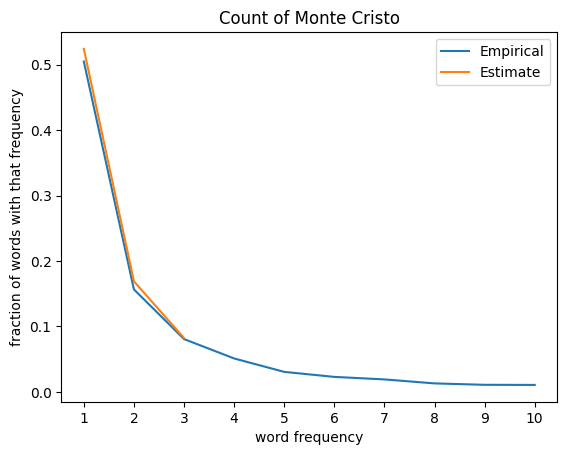

In [89]:
plt.plot(mc_group['word_frequency'][:10], mc_group['fraction'][:10], label='Empirical')
plt.plot([1,2,3], [n1_mc, n2_mc, n3_mc], label="Estimate")
plt.xlabel("word frequency")
plt.ylabel("fraction of words with that frequency")
plt.title("Count of Monte Cristo")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()

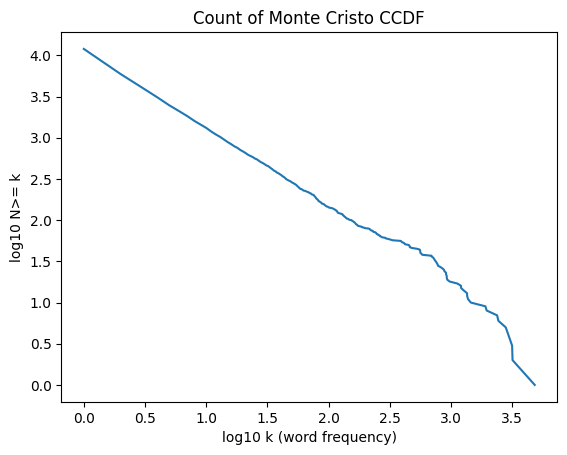

In [99]:
mc_group = mc_group.sort_values(by='word_frequency', ascending=False)
mc_group['cumul_num_words'] = mc_group['num_words'].cumsum()
mc_group['log10_ngreaterk'] = np.log10(mc_group['cumul_num_words'])
mc_group['log10_word_frequency'] = np.log10(mc_group['word_frequency'])

plt.plot(mc_group['log10_word_frequency'], mc_group['log10_ngreaterk'])
plt.xlabel("log10 k (word frequency)")
plt.ylabel("log10 N>= k")
plt.title("Count of Monte Cristo CCDF")
plt.show()